# Homework 4: Evaluation Metrics for Classification

https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2024/04-evaluation/homework.md

In [108]:
import pandas as pd
import numpy as np
import wget
import seaborn as sns
import matplotlib.pyplot as plt


In [109]:
df = pd.read_csv('bank-full.csv',sep=';')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [110]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [111]:
df.y = (df.y == "yes").astype('int64')

In [112]:
df = df.drop(columns=['default', 'loan'])
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [113]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [114]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [115]:
numerical_columns = list(df.dtypes[(df.dtypes == 'int64')].index)
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [116]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
#Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1

In [117]:
#Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [118]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
 
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values
 
del df_train['y']
del df_val['y']
del df_test['y'] 


In [119]:
#Which numerical variable (among the following 4) has the highest AUC?

auc_results = {}
numeric_columns = ['balance','day','duration','previous']

for col in numeric_columns:
    # Calcula el AUC
    auc = roc_auc_score(y_train, df_train[col])
    
    # Guarda el AUC en el diccionario
    auc_results[col] = auc
    
    # Si AUC es menor que 0.5, invierte la variable
    if auc < 0.5:
        df_train[col] = -df_train[col]
        print(f"Inverting {col}, AUC: {auc}")
    else:
        print(f"{col}, AUC: {auc}")


balance, AUC: 0.5888313805382317
Inverting day, AUC: 0.474042117616092
duration, AUC: 0.8147002759670778
previous, AUC: 0.5985653242764153


In [120]:
numerical_columns.remove('y')

In [121]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [145]:
X_train[0]

array([ 56.,  40.,   2.,   1.,   0.,   0., -11., 123.,   0.,   0.,   1.,
         0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,  -1.,   0.,   0.,
         0.,   1.,   0.])

In [123]:
y_test

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [124]:
val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [125]:
len(X_val[0])

47

In [126]:
dv.get_feature_names_out()

array(['age', 'balance', 'campaign', 'contact=cellular',
       'contact=telephone', 'contact=unknown', 'day', 'duration',
       'education=primary', 'education=secondary', 'education=tertiary',
       'education=unknown', 'housing=no', 'housing=yes', 'job=admin.',
       'job=blue-collar', 'job=entrepreneur', 'job=housemaid',
       'job=management', 'job=retired', 'job=self-employed',
       'job=services', 'job=student', 'job=technician', 'job=unemployed',
       'job=unknown', 'marital=divorced', 'marital=married',
       'marital=single', 'month=apr', 'month=aug', 'month=dec',
       'month=feb', 'month=jan', 'month=jul', 'month=jun', 'month=mar',
       'month=may', 'month=nov', 'month=oct', 'month=sep', 'pdays',
       'poutcome=failure', 'poutcome=other', 'poutcome=success',
       'poutcome=unknown', 'previous'], dtype=object)

In [127]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [128]:
# What's the AUC of this model on the validation dataset? (round to 3 digits)
# Predecir las probabilidades de la clase positiva
y_val_pred_prob = model.predict_proba(X_val)[:, 1]

# Calcular el AUC
auc = roc_auc_score(y_val, y_val_pred_prob)
print(f"AUC: {round(auc, 3)}")


AUC: 0.9


In [129]:
from sklearn.metrics import precision_score, recall_score

def evaluate_model_thresholds(y_true, y_scores):
    thresholds = np.arange(0.0, 1.01, 0.01)  # Umbrales de 0.0 a 1.0
    precisions = []
    recalls = []
    
    for threshold in thresholds:
        # Generar predicciones binarias basado en el umbral
        y_pred = (y_scores >= threshold).astype(int)
        
        # Calcular precisión y recall
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        
        precisions.append(precision)
        recalls.append(recall)
    
    return thresholds, precisions, recalls


In [130]:
# Ahora puedes usar esta variable codificada en tu evaluación
thresholds, precisions, recalls = evaluate_model_thresholds(y_val, y_val_pred_prob)

# Imprimir resultados (opcional)
for t, p, r in zip(thresholds, precisions, recalls):
    print(f'Threshold: {t:.2f}, Precision: {p:.3f}, Recall: {r:.3f}')

Threshold: 0.00, Precision: 0.121, Recall: 1.000
Threshold: 0.01, Precision: 0.138, Recall: 0.996
Threshold: 0.02, Precision: 0.167, Recall: 0.995
Threshold: 0.03, Precision: 0.200, Recall: 0.985
Threshold: 0.04, Precision: 0.239, Recall: 0.964
Threshold: 0.05, Precision: 0.276, Recall: 0.943
Threshold: 0.06, Precision: 0.311, Recall: 0.917
Threshold: 0.07, Precision: 0.339, Recall: 0.888
Threshold: 0.08, Precision: 0.361, Recall: 0.862
Threshold: 0.09, Precision: 0.382, Recall: 0.829
Threshold: 0.10, Precision: 0.400, Recall: 0.797
Threshold: 0.11, Precision: 0.416, Recall: 0.774
Threshold: 0.12, Precision: 0.437, Recall: 0.757
Threshold: 0.13, Precision: 0.452, Recall: 0.734
Threshold: 0.14, Precision: 0.462, Recall: 0.714
Threshold: 0.15, Precision: 0.466, Recall: 0.689
Threshold: 0.16, Precision: 0.479, Recall: 0.669
Threshold: 0.17, Precision: 0.496, Recall: 0.653
Threshold: 0.18, Precision: 0.510, Recall: 0.643
Threshold: 0.19, Precision: 0.519, Recall: 0.625
Threshold: 0.20, Pre

c:\Users\Gonzalo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


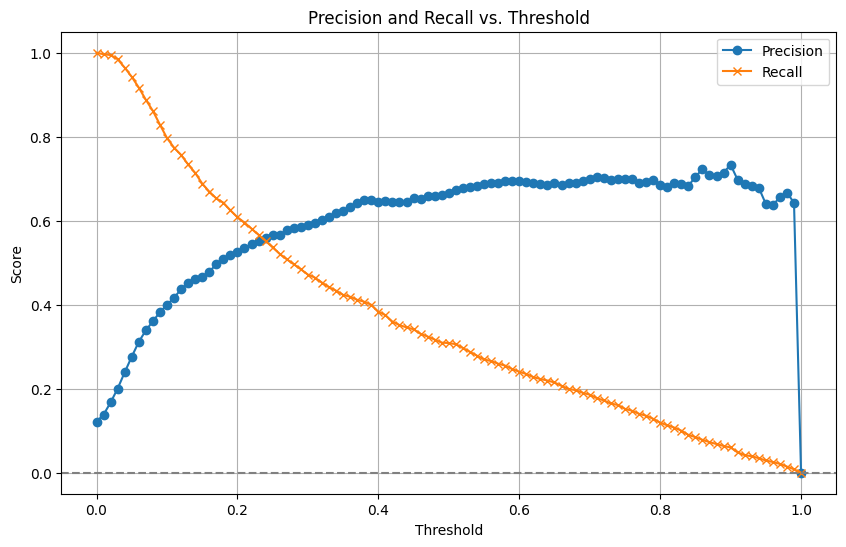

In [131]:
def plot_precision_recall(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions, label='Precision', marker='o')
    plt.plot(thresholds, recalls, label='Recall', marker='x')
    plt.title('Precision and Recall vs. Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.axhline(y=0, color='grey', linestyle='--')
    plt.show()

plot_precision_recall(precisions, recalls, thresholds)


In [132]:
# Question 4: F1 score

from sklearn.metrics import f1_score

def calculate_f1_for_thresholds(y_true, y_scores):
    thresholds = np.arange(0.0, 1.01, 0.01)  # Umbrales de 0.0 a 1.0
    f1_scores = []
    
    for threshold in thresholds:
        # Generar predicciones binarias basadas en el umbral
        y_pred = (y_scores >= threshold).astype(int)
        
        # Calcular la puntuación F1
        f1 = f1_score(y_true, y_pred)
        f1_scores.append(f1)
    
    return thresholds, f1_scores


In [133]:
# Supón que y_val son las etiquetas verdaderas y y_val_pred_prob son las probabilidades predichas
thresholds, f1_scores = calculate_f1_for_thresholds(y_val, y_val_pred_prob)

# Imprimir los resultados (opcional)
for t, f1 in zip(thresholds, f1_scores):
    print(f'Threshold: {t:.2f}, F1 Score: {f1:.3f}')


Threshold: 0.00, F1 Score: 0.217
Threshold: 0.01, F1 Score: 0.243
Threshold: 0.02, F1 Score: 0.286
Threshold: 0.03, F1 Score: 0.333
Threshold: 0.04, F1 Score: 0.383
Threshold: 0.05, F1 Score: 0.427
Threshold: 0.06, F1 Score: 0.465
Threshold: 0.07, F1 Score: 0.491
Threshold: 0.08, F1 Score: 0.508
Threshold: 0.09, F1 Score: 0.523
Threshold: 0.10, F1 Score: 0.532
Threshold: 0.11, F1 Score: 0.542
Threshold: 0.12, F1 Score: 0.554
Threshold: 0.13, F1 Score: 0.560
Threshold: 0.14, F1 Score: 0.561
Threshold: 0.15, F1 Score: 0.556
Threshold: 0.16, F1 Score: 0.558
Threshold: 0.17, F1 Score: 0.564
Threshold: 0.18, F1 Score: 0.569
Threshold: 0.19, F1 Score: 0.567
Threshold: 0.20, F1 Score: 0.564
Threshold: 0.21, F1 Score: 0.564
Threshold: 0.22, F1 Score: 0.562
Threshold: 0.23, F1 Score: 0.559
Threshold: 0.24, F1 Score: 0.556
Threshold: 0.25, F1 Score: 0.551
Threshold: 0.26, F1 Score: 0.543
Threshold: 0.27, F1 Score: 0.541
Threshold: 0.28, F1 Score: 0.536
Threshold: 0.29, F1 Score: 0.530
Threshold:

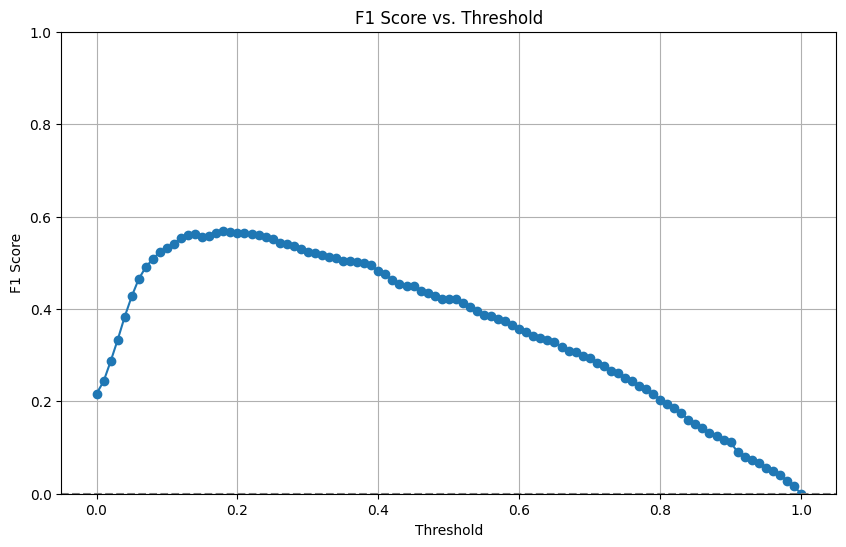

In [134]:
def plot_f1_score(f1_scores, thresholds):
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
    plt.title('F1 Score vs. Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.ylim(0, 1)
    plt.grid()
    plt.axhline(y=0, color='grey', linestyle='--')
    plt.show()

plot_f1_score(f1_scores, thresholds)


In [135]:
#Q5 - Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:
from sklearn.model_selection import KFold

In [136]:
def train(df_train, y_train):
    dicts = df_train[categorical_columns + numerical_columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', max_iter=1000, C=1.0)
    model.fit(X_train, y_train)
    
    return dv, model

In [137]:
dv, model = train(df_train, y_train)

In [138]:
def predict(df, dv, model):
    dicts = df[categorical_columns + numerical_columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [139]:
y_pred = predict(df_val, dv, model)

In [140]:
dv, model = train(df_full_train, df_full_train.y.values)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.9068469434564769

In [141]:
from tqdm.auto import tqdm

In [142]:
# How large is standard deviation of the scores across different folds?
n_splits = 5

for C in tqdm([1]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        dv, model = train(df_train, y_train)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/1 [00:00<?, ?it/s]

C=1 0.906 +- 0.006


In [143]:
# Which C leads to the best mean score?
def train(df_train, y_train,C):
    dicts = df_train[categorical_columns + numerical_columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [144]:
for C in tqdm([0.000001, 0.001, 1]):
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.701 +- 0.009
C=0.001 0.861 +- 0.007
C=1 0.906 +- 0.006
